# Business Understanding
Prediksi "harga" properti di kota Bandung, menggunakan ML berdasarkan parameter jumlah lahan, luas bangunan, dan luas lahan.

In [1]:
# !pip install -U scikit-learn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('properti_bdg.csv')
df

,judul,alamat,deskripsi,kamar,bangunan,lahan,harga
0,Promo Rumah Mewah Akhir Tahun,"Antapani, Bandung",Promo akhir tahun !! Hanya 500 jt-an + FREE SH...,3,75,84,590000000
1,Rumah modern Readystock di bandung raya cimahi...,"Bandung Wetan, Bandung",Rumah Baru modern 2 LT di Sayap Kota Cimahi de...,3,70,71,700000000
2,Dijual rumah 300 jutaan jalan lebar dekat Ikea...,"Padalarang, Bandung",*Jadilah konsumen CERDAS !* *Tips singkat sebe...,2,36,72,386000000
3,Dijual PROMO rumah 2 lantai di sayap Setiabudi...,Bandung,Copy writing nasc NUANSA ALAM SETIABUDHI CLOV...,2,60,60,499000000
4,Rumah Strategis Siap Huni di dekat Tol Cileuny...,"Cibiru Hilir, Bandung","Hunian Nyaman di Cibiru, Cileunyi, Bandung Tim...",2,90,114,397500000
...,...,...,...,...,...,...,...
1465,Rumah Lama Turangga,"Turangga, Bandung",Di jual rumah lama turangga\nLuas tanah : 240 ...,6,280,240,2800000000
1466,Rumah di nirwana residence bandung siap huni t...,Bandung,"Rumah bagus siap huni dan terawat, dekat denga...",3,180,90,1000000000
1467,Rumah Minimalis Siap Huni Sangat Murah Di Pinu...,"Soekarno Hatta, Bandung",Turun HargaHarga Awal 675 sekarang jadi 572 ne...,2,65,72,572000000
1468,Dijual Cepat Rumah Strategis di Komplek Batura...,"Rancasari, Bandung",Dijual Cepat Rumah di Komplek Batu Raden dekat...,6,160,318,2300000000


# Data Understanding
- Data di atas meruoakan data properti di daerah Bandung
<br>
- Objective goals: memprediksi harga
<br>
- Harga memeiliki type data numeric. Maka dari itu tim Data proposed metode Linear Regression.
<br>
- Kenapa Regresi? Dimana cariable x: ['kamar', 'bangunan', 'lahan'], y = [harga]
<br>
- Rumus regresi: Y = b + m1.x1 + m2.x2 + ... + mn.xn
<br>
mn = koefisien regresi / rata" perubahan y, jika x bertambah
<br>
b = intercept / Nilai pada saat x = 0.

In [4]:
df.shape

(1470, 7)

- Terdapat 1470 data observasi dan 7 features.
- Hapus features yang tidak relevan: ['alamat', 'deskripsi', 'judul']

In [5]:
# hapus features yang tidak relevan
df.drop(columns=['alamat', 'deskripsi', 'judul'], inplace=True)
df

,kamar,bangunan,lahan,harga
0,3,75,84,590000000
1,3,70,71,700000000
2,2,36,72,386000000
3,2,60,60,499000000
4,2,90,114,397500000
...,...,...,...,...
1465,6,280,240,2800000000
1466,3,180,90,1000000000
1467,2,65,72,572000000
1468,6,160,318,2300000000


In [6]:
df.info()
print("")
print("Cek null Values")
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   kamar     1470 non-null   int64
 1   bangunan  1470 non-null   int64
 2   lahan     1470 non-null   int64
 3   harga     1470 non-null   int64
dtypes: int64(4)
memory usage: 46.1 KB

Cek null Values


kamar       0
bangunan    0
lahan       0
harga       0
dtype: int64

Tidak ada null values

In [7]:
df.describe()

,kamar,bangunan,lahan,harga
count,1470.000000,1470.000000,1470.000000,1.470000e+03
mean,3.646259,177.489116,210.235374,2.581586e+09
std,2.535528,176.726326,500.109095,4.358051e+09
min,0.000000,0.000000,0.000000,6.500000e+07
25%,2.000000,65.000000,80.000000,6.750000e+08
50%,3.000000,122.500000,120.000000,1.370000e+09
75%,4.000000,230.000000,210.000000,3.000000e+09
max,47.000000,1850.000000,15000.000000,5.700000e+10


Terdapat data animali dari fitur kamar, terdapat kamar dengan jumlah 47. Selanjutnya bisa kita validasi di proses EDA.

# Exploratory Data Analysis

### Univariate Analysis
-- Hanya menganalisis 1 variable

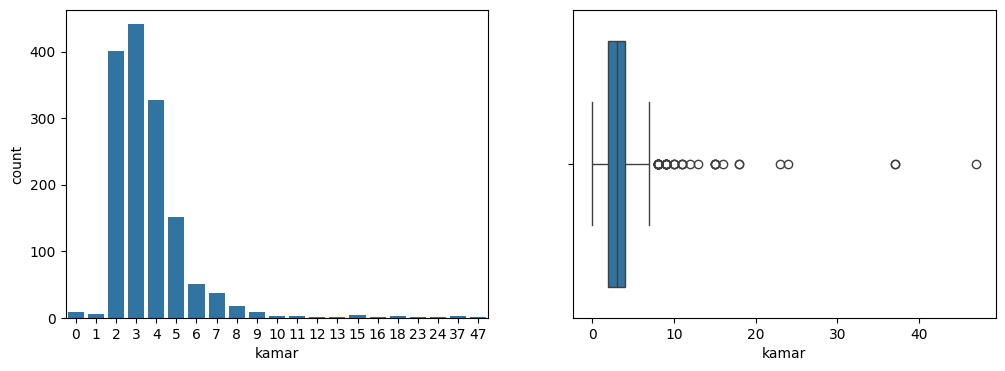

In [8]:
f = plt.figure(figsize=(12,4))

# countplot
plt.subplot(1, 2, 1)
sns.countplot(x=df['kamar'])

# boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=df['kamar'])

plt.show()

Terdapat outlier pada data kamar

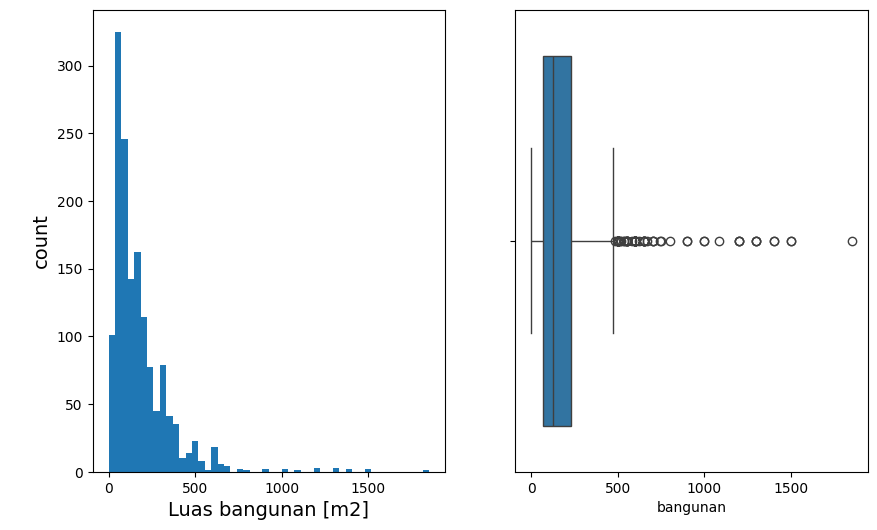

In [9]:
f = plt.figure(figsize=(12,4))

# countplot
plt.subplot(1, 2, 1)
df['bangunan'].plot(kind='hist', figsize=(10,6), bins=50) # bins = range nya per 50
plt.ylabel('\ncount', size=14)
plt.xlabel('Luas bangunan [m2]', size=14)

# boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=df['bangunan'])

plt.show()

Terdapat outlier dari fitur luas bangunan.

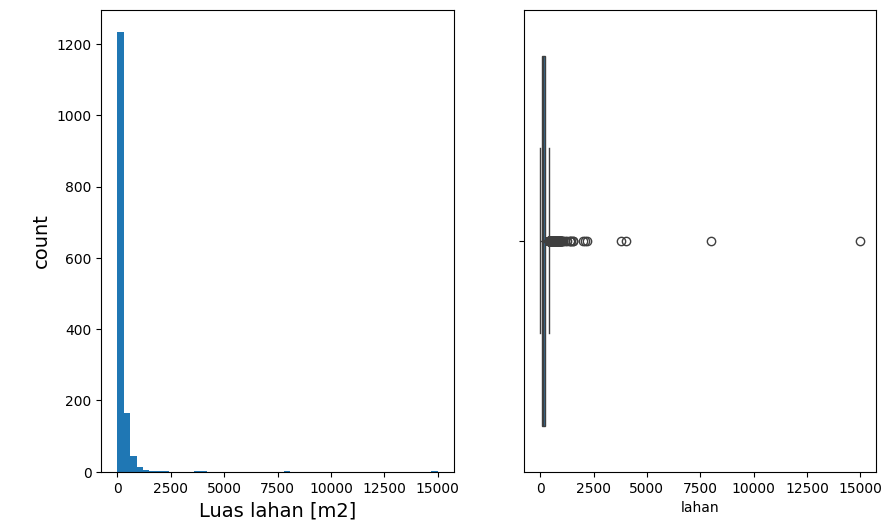

In [10]:
f = plt.figure(figsize=(12,4))

# countplot
plt.subplot(1, 2, 1)
df['lahan'].plot(kind='hist', figsize=(10,6), bins=50) # bins = range nya per 50
plt.ylabel('\ncount', size=14)
plt.xlabel('Luas lahan [m2]', size=14)

# boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=df['lahan'])

plt.show()

Terdapat outlier dari fitur luas lahan.

In [11]:
df['kamar'].unique()

array([ 3,  2,  7,  4, 13,  6,  5,  9,  8, 23,  1, 12, 15, 11, 10, 18,  0,
       24, 37, 16, 47], dtype=int64)

In [12]:
df['bangunan'].unique()

array([  75,   70,   36,   60,   90,   48,  200,  350,   30,  670,  100,
         65,   37,   21,   80,   45,   49,   40,   50,  140,  150,  450,
        170,   55,   73,   61,  315,  120,  110,   83,  250,   56,   38,
         77,   58,   68,  240,   98,  324,  101,  300,   86,  230,  320,
         34,  212,   43,  650,  135,   94,   54,   72,  260,  196,  180,
        123, 1085,   42,  124,   27,  400,  800,  115,  149,  241,   52,
         29,  126,  128,  160, 1500,   35,  125,   88,   74,   62,  235,
         78,  130,  147,  185,  470,  210,  411,  122,  340,  155,   39,
        600,  227,  276,  280,  141,  144,  348,   96,  175,  220,   85,
        129,  440,  190,  255,  237,  270,  127,  380,  376,  106,  159,
         69,  550,  167,  422,   53,  330,  156,  142,  177,  133,   87,
        290,  500,  214,  215,  269,  516,  213,  102,  114,  116,  171,
        317,  197,   81,  750,  323,   51,  145,  248,  325,  154,  420,
         89,  294,  216,  132,   47,  192,  136,  2

In [13]:
df['lahan'].unique()

array([   84,    71,    72,    60,   114,    80,   620,   276,   100,
         120,    35,    70,    50,    78,    69,   125,   110,   421,
          40,    65,    47,   342,    55,   260,   160,   254,    81,
          90,    92,    59,   150,    62,    36,   381,    37,    63,
         167,   148,   193,    66,   118,   126,    56,    41,   177,
         344,   278,     0,   215,   179,   264,   500,    83,   155,
          91,   320,   290,   300,   127,   128,   189,   102,   105,
         385,   112,   158,    96,    54,   130,   830,    34,   154,
         226,    88,    97,   450,    98,    45,   360,   190,   144,
          75,   380,   642,   255,  1170,    43,    57,   119,    95,
         140,    89,   267,    61,   108,   200,   210,   319,   223,
         233,   240,   212,   414,   411,    30,   161,   288,   152,
         136,   375,   861,   543,   180,   420,   204,   350,   170,
         477,   172,   588,    67,   207,   117,   387,   230,   262,
         187,   197,

In [14]:
## masking
mask_kamar = df['kamar'] < 5
mask_LT = df['lahan'] < 1000
mask_LB = df['bangunan'] < 1000

# Tampung di variable baru
df = df[mask_kamar & mask_LT & mask_LB]
df.info

<bound method DataFrame.info of       kamar  bangunan  lahan       harga
0         3        75     84   590000000
1         3        70     71   700000000
2         2        36     72   386000000
3         2        60     60   499000000
4         2        90    114   397500000
...     ...       ...    ...         ...
1461      3       100     72   980000000
1462      3       164    270  3200000000
1463      4       105     80   991000000
1466      3       180     90  1000000000
1467      2        65     72   572000000

[1173 rows x 4 columns]>

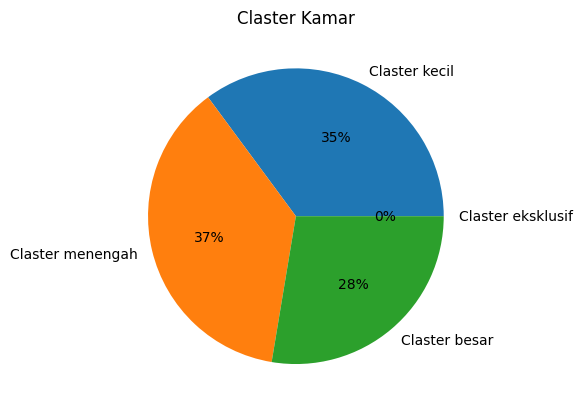

In [15]:
# Pie chart
min_kamar = df['kamar'].min()
max_kamar = df['kamar'].max()

q = df['kamar'].quantile([.25, .5, .75])

kmr_kcl = df.loc[df['kamar'] <= q[0.25]]
kmr_mng = df.loc[(df['kamar'] > q[0.25]) & (df['kamar'] <= q[0.5])]
kmr_bsr = df.loc[(df['kamar'] > q[0.5]) & (df['kamar'] <= q[0.75])]
kmr_eks = df.loc[df['kamar'] > q[0.75]]


plt.pie([len(kmr_kcl), len(kmr_mng), len(kmr_bsr), len(kmr_eks)],
        labels=["Claster kecil", "Claster menengah", "Claster besar", "Claster eksklusif"],
        autopct="%0.f%%")
plt.title("Claster Kamar")
plt.show()

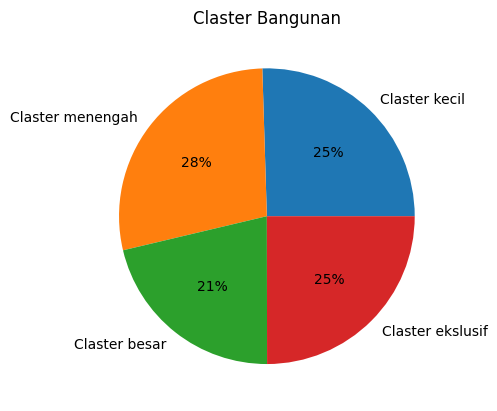

In [16]:
# Pie chart
min_bangunan = df['bangunan'].min()
max_bangunan = df['bangunan'].max()

q = df['bangunan'].quantile([.25, .5, .75])

bangunan_kcl = df.loc[df['bangunan'] <= q[0.25]]
bangunan_mng = df.loc[(df['bangunan'] > q[0.25]) & (df['bangunan'] <= q[0.5])]
bangunan_bsr = df.loc[(df['bangunan'] > q[0.5]) & (df['bangunan'] <= q[0.75])]
bangunan_eks = df.loc[df['bangunan'] > q[0.75]]

plt.pie([len(bangunan_kcl), len(bangunan_mng), len(bangunan_bsr), len(bangunan_eks)],
        labels=["Claster kecil", "Claster menengah", "Claster besar", "Claster ekslusif"],
        autopct="%0.f%%")
plt.title("Claster Bangunan")
plt.show()

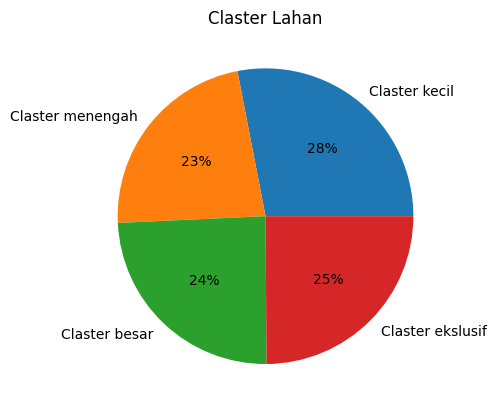

In [17]:
# Pie chart
min_lahan = df['lahan'].min()
max_lahan = df['lahan'].max()

q = df['lahan'].quantile([.25, .5, .75])

lahan_kcl = df.loc[df['lahan'] <= q[0.25]]
lahan_mng = df.loc[(df['lahan'] > q[0.25]) & (df['lahan'] <= q[0.5])]
lahan_bsr = df.loc[(df['lahan'] > q[0.5]) & (df['lahan'] <= q[0.75])]
lahan_eks = df.loc[df['lahan'] > q[0.75]]

plt.pie([len(lahan_kcl), len(lahan_mng), len(lahan_bsr), len(lahan_eks)],
        labels=["Claster kecil", "Claster menengah", "Claster besar", "Claster ekslusif"],
        autopct="%0.f%%")
plt.title("Claster Lahan")
plt.show()

In [18]:
# ! pip install -U Jinja2

Jelasin sebaran data hasil univariate analysis

In [19]:
df.corr().style.background_gradient().format(precision=2)

,kamar,bangunan,lahan,harga
kamar,1.00,0.54,0.41,0.25
bangunan,0.54,1.00,0.75,0.64
lahan,0.41,0.75,1.00,0.76
harga,0.25,0.64,0.76,1.00


Jelasin multivariate analysis

# Modeling

In [20]:
df

,kamar,bangunan,lahan,harga
0,3,75,84,590000000
1,3,70,71,700000000
2,2,36,72,386000000
3,2,60,60,499000000
4,2,90,114,397500000
...,...,...,...,...
1461,3,100,72,980000000
1462,3,164,270,3200000000
1463,4,105,80,991000000
1466,3,180,90,1000000000


In [21]:
# tentukan variable dependen dan independen
x = df.drop(columns='harga')
y = df['harga']

# split data 80% - 20%
# opsi 2: 70% - 30%
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# assign model RL
lin_reg = LinearRegression()

lin_reg.fit(x_train, y_train)

LinearRegression()

In [22]:
df = df.groupby('harga')
df.first()

,kamar,bangunan,lahan
harga,,,
65000000,2,21,35
100000000,2,30,40
115000000,2,36,60
130000000,2,30,50
135000000,2,36,48
...,...,...,...
22000000000,4,177,679
34000000000,0,500,850
38000000000,4,600,800


In [23]:
# buat evaluasi model
y_pred = lin_reg.predict(x_test)
lin_reg.score(x_test, y_test)

0.6610715018985451

In [29]:
# solve business problem
input_data = pd.DataFrame({'kamar': [2],
                           'bangunan': [220],
                           'lahan': [350]})

# pakai model buat prediksi dari input POST
predict = lin_reg.predict(input_data)
predict = round(float(predict[0]), 2)

predict = "{:,}".format(predict)
print("Rp", predict)

Rp 6,192,844,546.1


# Use Case 2

In [31]:
# tentukan variable dependen dan independen

df2 = pd.read_csv('properti_bdg.csv')

x = df2[['harga']]
y = df2[['kamar', 'bangunan', 'lahan']]

# split data 80% - 20%
# opsi 2: 70% - 30%

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# assign model RL
lin_reg = LinearRegression()

lin_reg.fit(x_train, y_train)

LinearRegression()

In [42]:
import locale

harga_min = df2['harga'].min()

harga_to_predict = 400000000

if harga_to_predict < harga_min:
    print(f"Harga yang dimasukan ({harga_to_predict}) terlalu kecil. Sistem tidak bisa memberikan rekomendasi spesifikasi properti yang diinginkan.")
else:
    locale.setlocale(locale.LC_ALL, 'id_ID')
    harga_formated = locale.currency(harga_to_predict, grouping=True)

    df_input = pd.DataFrame({'harga': [harga_to_predict]})
    predict_features = lin_reg.predict(df_input)

    hasil_prediksi = {y.columns[i]: round((predict_features[0][i])) for i in range (len(y.columns))}
    print(f"Spesifikasi rumah dengan harga {harga_formated}:")
    print(hasil_prediksi)

Spesifikasi rumah dengan harga Rp400.000.000,00:
{'kamar': 3, 'bangunan': 118, 'lahan': 99}
